<a href="https://colab.research.google.com/github/thompf2/Machine-Learning-Engineering/blob/main/Thompson_662020314.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Faydia Thompson

RIN: 662020314

Exam #1

Problem 1:

Patterns observed in the data are -

Class Distribution: Class 0 (defect-free) samples are clustered in the bottom-left region of the plots, indicating that they tend to have lower values for most of the features. In contrast, Class 1 (defective) samples are more spread out, particularly above the Class 0 cluster, suggesting that defective samples exhibit a wider range of feature values.

Feature Relationships: Some features, such as area, texture, and radius, appear to show a potential linear relationship when examining their corresponding rows in the pair plots. This suggests a correlation between these features, where an increase in one may be associated with an increase in the others.

Lack of Strong Linear Correlation: While certain features like area, texture, and radius may show some linear relationship, no strong linear correlations are evident across the entire dataset. This suggests that more complex, non-linear relationships might exist between the features.

Overall, the pair plots suggest that defect-free and defective samples are mostly distinguishable, with defect-free samples occupying a distinct region in the feature space.



Mounted at /content/drive


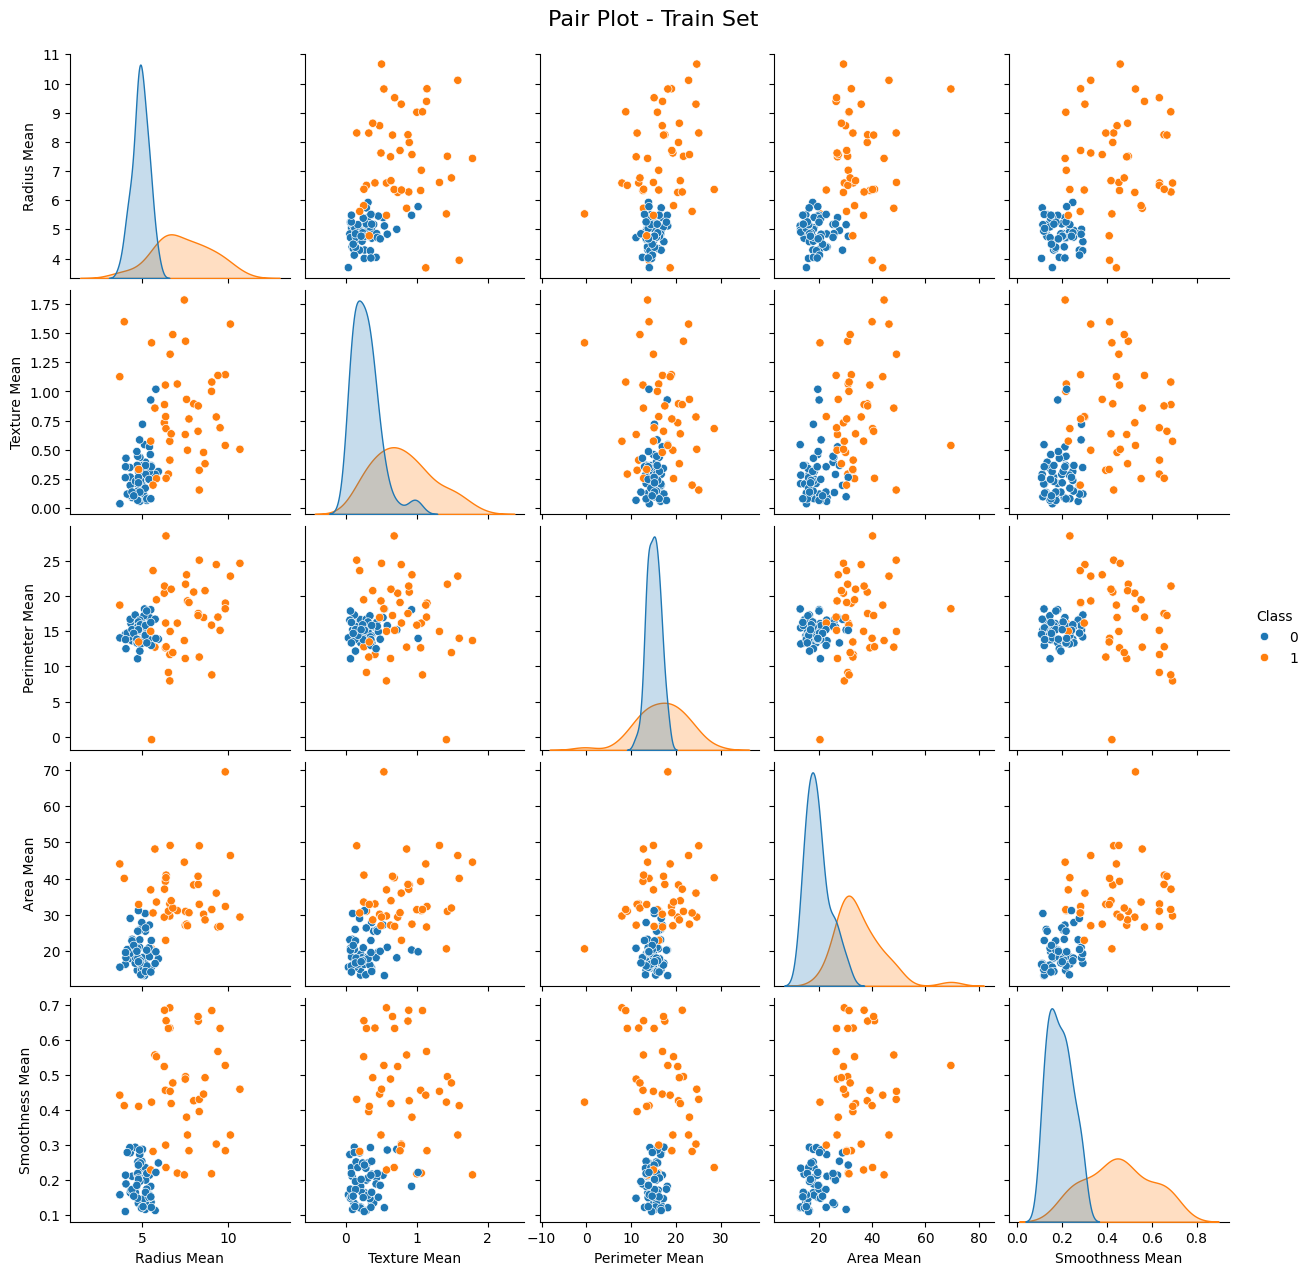

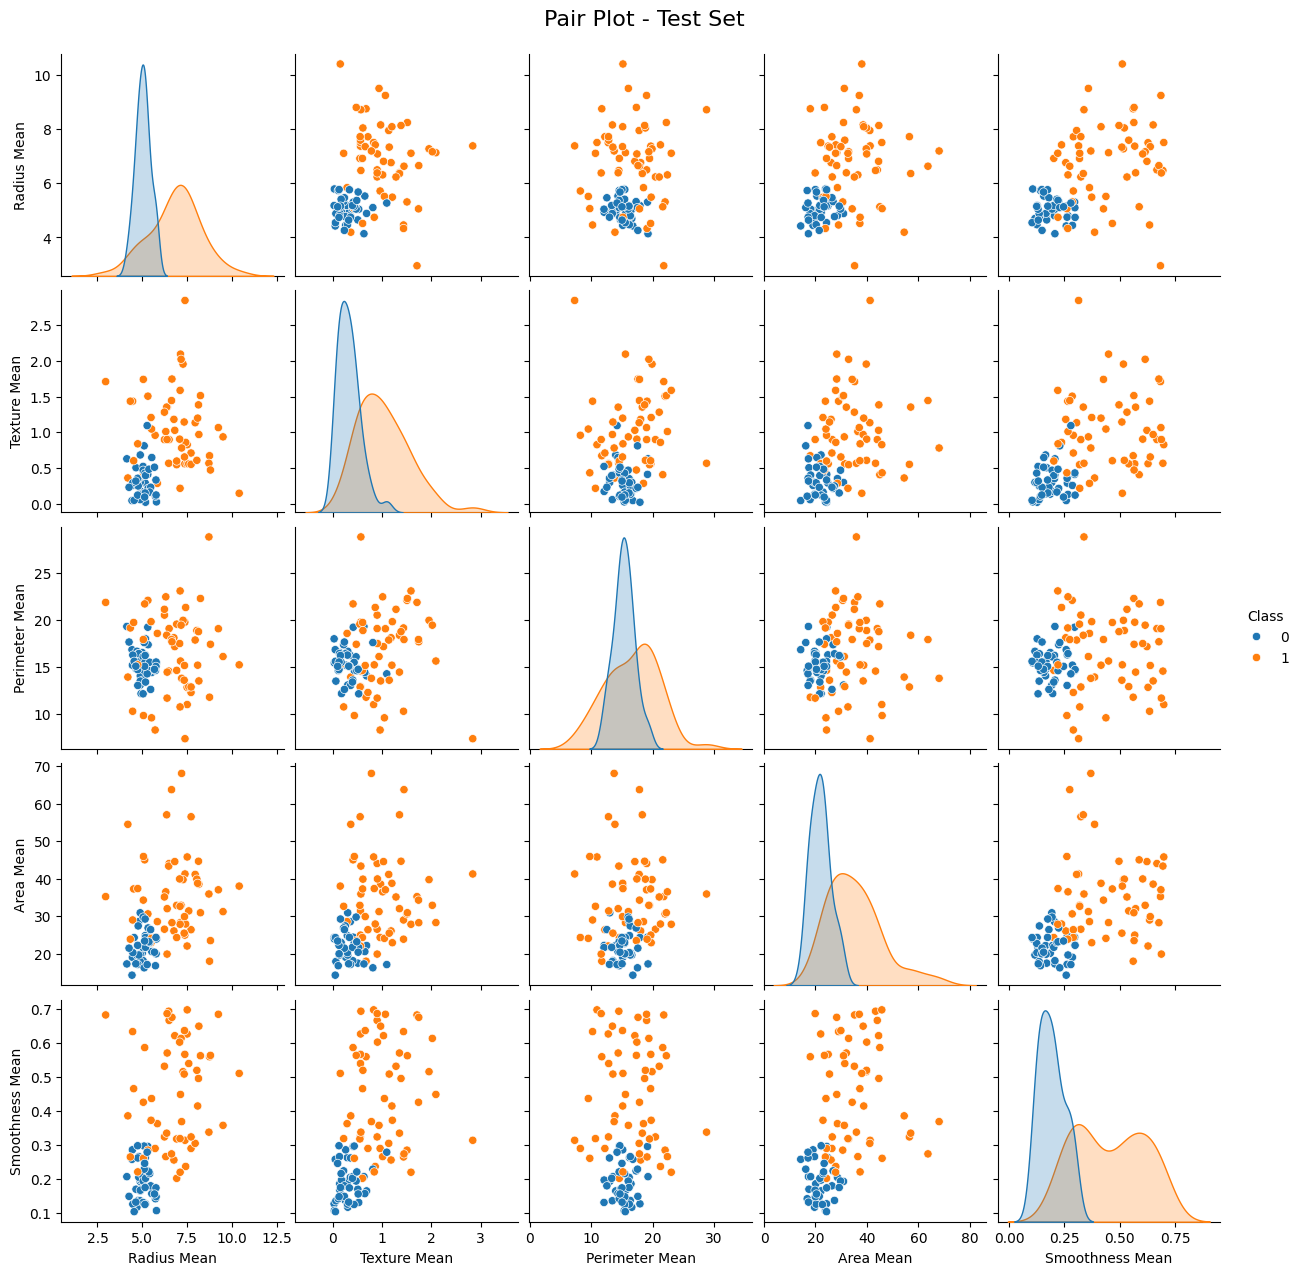

In [3]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File path in Google Drive
file_path1 = '/content/drive/My Drive/Machine Learning Engineering/Exam 1 Data/semiconductor_train_set.csv'
train_set = pd.read_csv(file_path1)

file_path2 = '/content/drive/My Drive/Machine Learning Engineering/Exam 1 Data/semiconductor_test_set.csv'
test_set = pd.read_csv(file_path2)


# pair plot for train set
sns.pairplot(train_set, hue="Class", height=2.5)
plt.suptitle("Pair Plot - Train Set", y=1.02, fontsize=16)

# pair plot for test set
sns.pairplot(test_set, hue="Class", height=2.5)
plt.suptitle("Pair Plot - Test Set", y=1.02, fontsize=16)

# show the plots
plt.show()



Problem 2:



In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# separate features (X) and target (y)
X_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1]

X_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:, -1]

knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(X_train, y_train)

# evaluate the model on the test set and output the accuracy score
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# make predictions on the test set (this is the numerical output: 0 or 1)
y_pred = knn.predict(X_test)



Accuracy: 0.9


Problem 3:


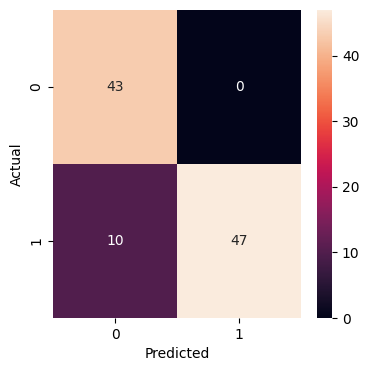

In [5]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Problem 4:

10 defective samples in the test set were misclassified.




Problem 5:

average precision: 0.91

recall: 0.91

f1 score: 0.90

accuracy: 0.90

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90        43
           1       1.00      0.82      0.90        57

    accuracy                           0.90       100
   macro avg       0.91      0.91      0.90       100
weighted avg       0.92      0.90      0.90       100




Problem 6:

The silhouette score is 0.4600462517146912


In [7]:
from sklearn.metrics import silhouette_score

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None

    def fit(self, X):
        # Convert X to a NumPy array before indexing
        X_np = X.to_numpy()
        self.centroids = X_np[np.random.choice(X_np.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X_np - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X_np[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check for convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        # Convert X to a NumPy array before indexing
        X_np = X.to_numpy()
        distances = np.array([np.linalg.norm(X_np - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

# create and fit the custom kmeans model
kmeans = KMeans(k=3)
kmeans.fit(X_train)
preds = kmeans.predict(X_test)

#calculate and show silhoutete score
sil_score = silhouette_score(X_test, preds)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.4600462517146912


End of test.